In [6]:
import pandas as pd

In [7]:
df_1 = pd.read_csv('./training_data_09-06-2022-18-37-47.csv')
df_2 = pd.read_csv('./training_data_09-06-2022-19-51-00.csv')
df_3 = pd.read_csv('./training_data_09-06-2022-19-53-32.csv')
df_4 = pd.read_csv('./training_data_09-06-2022-19-56-27.csv')
df = pd.concat([df_1,df_2,df_3,df_4])

# Analyse Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9685 entries, 0 to 2604
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9685 non-null   int64  
 1   i_sensor_1  9685 non-null   int64  
 2   i_sensor_2  9685 non-null   int64  
 3   i_sensor_3  9685 non-null   int64  
 4   o_left      9685 non-null   bool   
 5   o_right     9685 non-null   bool   
 6   i_sensor_4  9685 non-null   float64
 7   i_sensor_5  9685 non-null   float64
dtypes: bool(2), float64(2), int64(4)
memory usage: 548.6 KB


<AxesSubplot:>

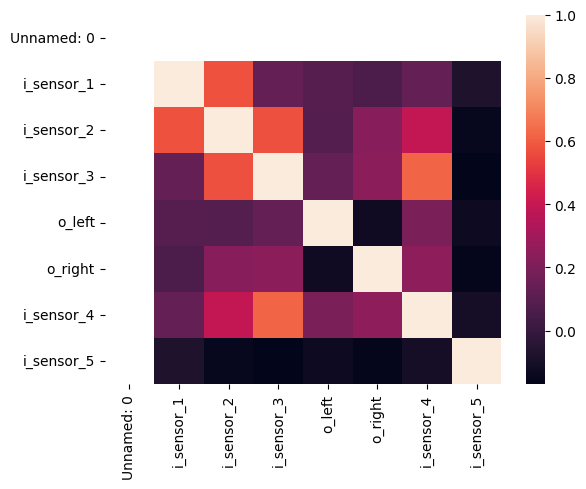

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

# Scale/convert input values

In [10]:
df = df.astype({'o_left': int, 'o_right': int})   

In [11]:
df.head()

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right,i_sensor_4,i_sensor_5
0,0,49,56,64,0,0,172.0,199.0
1,0,49,56,59,0,0,169.0,199.0
2,0,49,51,56,0,0,166.0,199.0
3,0,47,49,54,0,0,163.0,199.0
4,0,47,49,54,0,0,158.0,199.0


In [12]:
df[df['o_left']==1]

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right,i_sensor_4,i_sensor_5
139,0,42,45,49,1,0,77.0,199.0
140,0,42,46,48,1,0,77.0,199.0
141,0,41,45,49,1,0,77.0,200.0
142,0,42,46,49,1,0,77.0,199.0
143,0,42,46,50,1,0,79.0,199.0
...,...,...,...,...,...,...,...,...
2497,0,40,39,43,1,0,47.0,198.0
2498,0,40,39,44,1,0,46.0,198.0
2515,0,38,41,45,1,0,46.0,198.0
2516,0,38,42,41,1,0,49.0,198.0


# Set Train and test 

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(['o_left','o_right','Unnamed: 0'],axis=1).values
y = df[['o_left','o_right']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Create neural network

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [15]:
import os
model = Sequential()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.1,
    patience=100,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

X_train.shape

(6779, 5)

In [16]:
model.add(Dense(units=8, input_dim=5,activation='relu'))

model.add(Dense(units=4,activation='relu'))

model.add(Dense(units=4,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model

In [17]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=800,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stopping]
         )

Epoch 1/800
212/212 [==============================] - 1s 1ms/step - loss: 10.4692 - accuracy: 0.3679 - val_loss: 1.4923 - val_accuracy: 0.2736
Epoch 2/800
212/212 [==============================] - 0s 898us/step - loss: 0.9511 - accuracy: 0.4431 - val_loss: 0.7199 - val_accuracy: 0.5912
Epoch 3/800
212/212 [==============================] - 0s 888us/step - loss: 0.6470 - accuracy: 0.6743 - val_loss: 0.5809 - val_accuracy: 0.6869
Epoch 4/800
212/212 [==============================] - 0s 916us/step - loss: 0.5560 - accuracy: 0.7439 - val_loss: 0.5181 - val_accuracy: 0.7619
Epoch 5/800
212/212 [==============================] - 0s 894us/step - loss: 0.5057 - accuracy: 0.6783 - val_loss: 0.4783 - val_accuracy: 0.1125
Epoch 6/800
212/212 [==============================] - 0s 877us/step - loss: 0.4707 - accuracy: 0.1233 - val_loss: 0.4477 - val_accuracy: 0.1108
Epoch 7/800
212/212 [==============================] - 0s 893us/step - loss: 0.4443 - accuracy: 0.1214 - val_loss: 0.4238 - val_acc

212/212 [==============================] - 0s 884us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 58/800
212/212 [==============================] - 0s 886us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 59/800
212/212 [==============================] - 0s 890us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 60/800
212/212 [==============================] - 0s 896us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 61/800
212/212 [==============================] - 0s 893us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 62/800
212/212 [==============================] - 0s 895us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy: 0.1101
Epoch 63/800
212/212 [==============================] - 0s 894us/step - loss: 0.3477 - accuracy: 0.1208 - val_loss: 0.3307 - val_accuracy

In [18]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

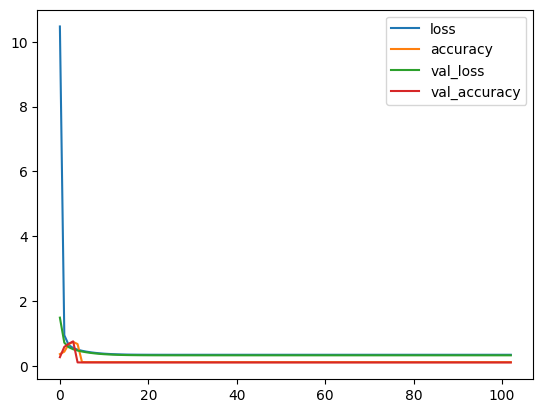

In [19]:
model_loss.plot()

In [20]:
model.save('car_game_model.h5')

In [21]:
import keras
model = keras.models.load_model('car_game_model.h5')

In [26]:
from car_game.car_game import CarGame
from car_game.road_enum import RoadEnum
    
car_game = CarGame(screen_size=(1280, 720), car_speed=4, frame_rate=20,
                   road=RoadEnum.THREE, sensor_threshold=200, generate_train_data=False, nn_model=model, 
                   probability_to_decide=0.8)

car_game.start_game()


1/1 [==============================] - 0s 11ms/step
[[0.70795053 0.29204944]]
1/1 [==============================] - 0s 12ms/step
[[0.7305005  0.26949942]]
1/1 [==============================] - 0s 11ms/step
[[0.7761604  0.22383957]]
1/1 [==============================] - 0s 10ms/step
[[0.80108833 0.19891159]]
1/1 [==============================] - 0s 10ms/step
[[0.83039683 0.16960317]]
1/1 [==============================] - 0s 10ms/step
[[0.85584694 0.14415303]]
1/1 [==============================] - 0s 10ms/step
[[0.8591073  0.14089271]]
1/1 [==============================] - 0s 10ms/step
[[0.8605951  0.13940483]]
1/1 [==============================] - 0s 10ms/step
[[0.6068823  0.39311773]]
1/1 [==============================] - 0s 10ms/step
[[0.54064786 0.45935217]]
1/1 [==============================] - 0s 10ms/step
[[0.52497244 0.4750276 ]]
1/1 [==============================] - 0s 10ms/step
[[0.52497244 0.4750276 ]]
1/1 [==============================] - 0s 10ms/step
[[0.52497244